<a href="https://colab.research.google.com/github/angelosil/img-compare/blob/main/img_compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carregue um ou mais imagens jpg ou png para analise
### Se necessário utilize as imagens contidas na pasta https://github.com/angelosil/img-compare do repositorio

---

### Importante:
##### Informe sua api_key. Para obter uma acesse: [Google API Key](https://aistudio.google.com/app/apikey)
##### Se necessário faça o carregamento das seguintes libs:
##### !pip install google-generativeai

In [49]:
from pathlib import Path
import io
import google.generativeai as genai
from google.colab import files
import matplotlib.pyplot as plt

genai.configure(api_key="<informe sua api key>")

# Set up the model
generation_config = {
  "temperature": 1,
  "top_p": 0.95,
  "top_k": 0,
  "max_output_tokens": 8192,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
]

system_instruction = "Você é um especialista em analise de imagens. Compare as imagens carregadas e detalhe as diferenças. Retorne apenas o texto com as diferenças e dados das imagens"

model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest",
                              generation_config=generation_config,
                              system_instruction=system_instruction,
                              safety_settings=safety_settings)

In [53]:
def uploadfile():
  print("Carregue suas imagens")
  uploaded = files.upload()
  filesload = []
  arquivos_txt = {nome: conteudo for nome, conteudo in uploaded.items() if (nome.endswith('.jpg') or nome.endswith('.jepg') or nome.endswith('.png')) }
  nomes_imagens = []

  for nome, conteudofile in arquivos_txt.items():
    print(f"Nome da imagem: {nome}")
    filesload.append(genai.upload_file(f"/content/{nome}" ))
    nomes_imagens.append(f"/content/{nome}")

  for nome_imagem in nomes_imagens:
    imagem = plt.imread(nome_imagem)
    plt.imshow(imagem)
    plt.show()



  return filesload


Carregue suas imagens


Saving corgi_cinza_180.png to corgi_cinza_180.png
Saving corgi2.jpg to corgi2.jpg
Saving corgi.jpg to corgi.jpg
Nome da imagem: corgi_cinza_180.png
Nome da imagem: corgi2.jpg
Nome da imagem: corgi.jpg


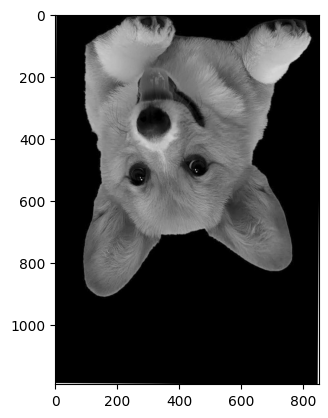

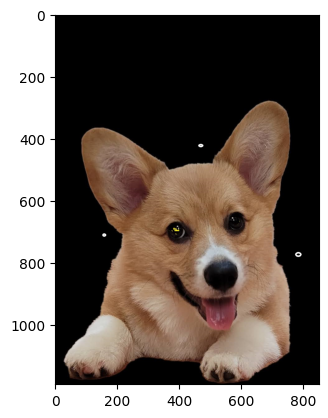

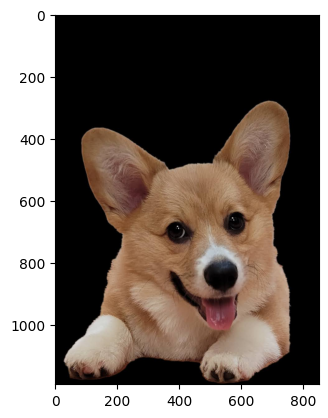

---------------------------------------------------
A primeira imagem é em preto e branco, enquanto as outras duas são coloridas.
 A primeira imagem mostra o cachorro de cabeça para baixo, enquanto nas outras duas o cachorro está deitado de bruços.
 A segunda imagem possui três pequenos círculos brancos, enquanto a terceira imagem não possui.
 

---------------------------------------------------


In [55]:
def loadPromt():
  filesload = uploadfile()
  prompt_parts = filesload

  response = model.generate_content(prompt_parts)
  print("---------------------------------------------------")
  texto_formatado = response.text.replace(".", ".\n")
  print(texto_formatado)
  print("---------------------------------------------------")

loadPromt()